# Non Isomorphic Trees

#### The goal of this experiment is to find trees such that it has vertices a and b and G\a is not isomorphic to G\b

In [37]:
from sage.graphs.trees import TreeIterator

In [39]:
def isomorphic_test(X, n, cnt):
    phi_X = X.charpoly()
    phi = []
    matrices = []
    
    # precompute the characteristic polynomial
    for a in range(n):
        X_a = (X.delete_rows([a])).delete_columns([a])
        phi.append(X_a.charpoly())   
        matrices.append(X_a);
            
    # compute set of cospectral vertices with a given vertex
    for a in range(n):
        for b in range(a+1, n):
            if(phi[a]!=phi[b]): continue  # a and b are not cospectral 
                
            X_ab = X.delete_rows([a, b]).delete_columns([a, b])
            phi_ab = X_ab.charpoly()

            g = phi_X.gcd(phi_ab)
            f = phi_X / g
            f1 = f.derivative(x)

            val = f.gcd(f1)

            if val.derivative() != 0: continue  # a and b are not parallel
            
            G_a = Graph(matrices[a])
            G_b = Graph(matrices[b])
            
            if(G_a.is_isomorphic(G_b)): continue  # G\a ~ G\b
            print(f"At graph {cnt}, G\\{a} is not isomorphic to G\\{b}")
            T.append(Graph(X))
            #print(f"Matrix = {X}")
            #P = Graph(X).plot(title=f'Vertices {a} and {b} are strongly cospectral')
            #P.show()
            #P.save(f"data/non_isomorphic_chris/Tree_{len(T)}_vts_{n}.png")
            
            #with open(f"../data/non_isomorphic/{n}v_num{cnt}_cospectral_{a}_{b}.txt", "w") as fin:
            #    fin.write(f"At graph {cnt}, G\\{a} is not isomorphic to G\\{b}\n")
            #    fin.write(f"Matrix = \n{X}")            

In [40]:
n = 9
r = 6
for i in range(n, n+r):
    print(f"Trying graphs with {i} vertices")
    cnt = 0
    for t in TreeIterator(i):
        cnt+=1
        A = t.adjacency_matrix()
        
        #P = t.plot()
        #P.show()
        isomorphic_test(A, i, cnt)

Trying graphs with 9 vertices
At graph 3, G\1 is not isomorphic to G\6
Trying graphs with 10 vertices
Trying graphs with 11 vertices
At graph 40, G\1 is not isomorphic to G\7
Trying graphs with 12 vertices
At graph 5, G\4 is not isomorphic to G\7
At graph 61, G\1 is not isomorphic to G\10
At graph 101, G\0 is not isomorphic to G\3
At graph 331, G\0 is not isomorphic to G\1
Trying graphs with 13 vertices
At graph 36, G\4 is not isomorphic to G\8
At graph 43, G\1 is not isomorphic to G\9
At graph 220, G\0 is not isomorphic to G\2
At graph 414, G\2 is not isomorphic to G\7
At graph 414, G\3 is not isomorphic to G\11
At graph 414, G\4 is not isomorphic to G\12
At graph 531, G\1 is not isomorphic to G\8
At graph 658, G\1 is not isomorphic to G\6
Trying graphs with 14 vertices
At graph 72, G\2 is not isomorphic to G\10
At graph 180, G\4 is not isomorphic to G\9
At graph 238, G\0 is not isomorphic to G\3
At graph 239, G\3 is not isomorphic to G\8
At graph 462, G\2 is not isomorphic to G\8
At 

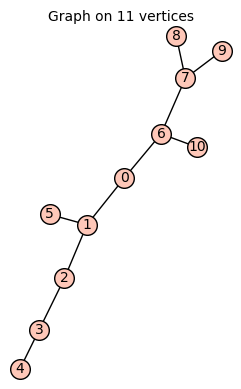

In [43]:
T[1]

In [3]:
G = Graph()

At graph 771, G\0 is not isomorphic to G\1
At graph 771, G\2 is not isomorphic to G\7


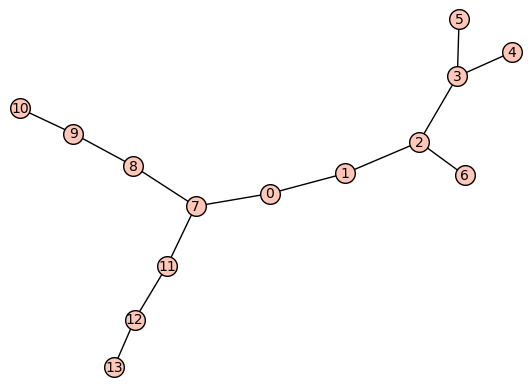

In [4]:
cnt = 0
for t in TreeIterator(14):
    cnt+=1
    if(cnt==771):
        isomorphic_test(t.adjacency_matrix(), 14, cnt)
        P = t.plot()
        P.show()
        G = t
        break

### Since $T_1$ and $T_2$ seams to have strongly cospectral vertices depending on the tree that it's placed in between $a$ and $b$, let's try to add several trees

### The main question is if our condition for $a$ and $b$ be strongly cospectral  prevents $c$ to also be strongly cospectral

In [5]:
def strongly_ab(a, b, X, c=-1, cnt=0):
    X_a = (X.delete_rows([a])).delete_columns([a])
    phi_a = X_a.charpoly()
    
    X_b = (X.delete_rows([b])).delete_columns([b])
    phi_b = X_b.charpoly()
    
    if(phi_a!=phi_b): 
        #print(f"{a} and {b} are not cospectral at graph {cnt} when connected to {c}")
        return False
        
    X_ab = X.delete_rows([a, b]).delete_columns([a, b])
    phi_ab = X_ab.charpoly()

    phi_X = X.charpoly()
    g = phi_X.gcd(phi_ab)
    f = phi_X / g
    f1 = f.derivative(x)

    val = f.gcd(f1)

    if val.derivative() != 0: 
        #print(f"{a} and {b} are not parallel at graph {cnt} when connected to {c}")
        return False
        
    if c!=-1:
        if(strongly_ab(a, c, X)):
            print("WE FOUND, THE GRAPH IS:")
            print(cnt)
    #print(f"{a} and {b} are strongly cospectral at graph {cnt} when connected to {c}")
    return True

In [50]:
d1 = {0:[1, 4], 1:[2], 2:[3], 4:[5], 5:[6]}
T_1 = Graph(d1)
d2 = {0:[1, 2], 2:[3, 4]}
T_2 = Graph(d2)

In [61]:
n = 1
r = 10
for i in range(n, n+r):
    print(f"Trying graphs with {i} vertices")
    cnt = 0
    for T_3 in TreeIterator(i):
        if(T_3.is_isomorphic(T_1) or T_3.is_isomorphic(T_2)):
            print("Isomorphic")
            continue
        cnt+=1
        
        t = T_3.copy()
        p = i
        for k in T_1:
            t.add_vertex(k + p)
        for e in T_1.edges():
            t.add_edge(e[0] + p, e[1] + p)

        p += T_1.size()+1

        for k in T_2:
            t.add_vertex(k + p)
        for e in T_2.edges():
            t.add_edge(e[0] + p, e[1] + p)

        a = i
        b = i + T_1.size() + 1
        p += T_2.size() + 1
        t.add_vertex(p)
        t.add_edge(p, a)
        t.add_edge(p, b)
        
        for v in T_3:
            T = t.copy()
            T.add_edge(p, v)
            
            if(not strongly_ab(a, b, T.adjacency_matrix(), v, cnt)):
                print(f"Conjecture is false, at this graph {a} and {b} are not strongly cospectral")
                P = T.plot()
                P.show()

Trying graphs with 1 vertices
Trying graphs with 2 vertices
Trying graphs with 3 vertices
Trying graphs with 4 vertices
Trying graphs with 5 vertices
Isomorphic
Trying graphs with 6 vertices
Trying graphs with 7 vertices
Isomorphic
Trying graphs with 8 vertices
Trying graphs with 9 vertices
Trying graphs with 10 vertices


### Seams to be right :)

### We can find examples where $\phi(T_1)/\phi(T_1\backslash a) = \phi(T_2)/\phi(T_2\backslash b) = \phi(T_3)/\phi(T_3\backslash c)$?

In [9]:
st = set()
st2 = set()
t3 = []

n = 1
r = 15
for i in range(n, n+r):
    print(f"Trying graphs with {i} vertices")
    cnt = 0
    for t in TreeIterator(i):
        cnt += 1
        phi_at = []
        phi_at2 = []
        X = t.adjacency_matrix()
        phi_X = X.charpoly()
        
        for a in t:
            X_a = (X.delete_rows([a])).delete_columns([a])
            phi_a = X_a.charpoly()
            frac = phi_X/phi_a
                
            if frac in st:
                if(frac in st2):
                    print(f"Found a triple using graph {cnt}, v={a}")
                    t3.append(frac)
                phi_at2.append(frac)
            phi_at.append(frac)
        
        for phi in phi_at:
            st.add(phi)
        for phi in phi_at2:
            st2.add(phi)
    #print(st)

Trying graphs with 1 vertices
Trying graphs with 2 vertices
Trying graphs with 3 vertices
Trying graphs with 4 vertices
Trying graphs with 5 vertices
Trying graphs with 6 vertices
Trying graphs with 7 vertices
Trying graphs with 8 vertices
Trying graphs with 9 vertices
Trying graphs with 10 vertices
Trying graphs with 11 vertices
Found a triple using graph 24, v=0
Trying graphs with 12 vertices
Found a triple using graph 27, v=0
Found a triple using graph 80, v=2
Found a triple using graph 114, v=0
Found a triple using graph 114, v=11
Found a triple using graph 134, v=0
Found a triple using graph 134, v=3
Found a triple using graph 138, v=8
Found a triple using graph 352, v=0
Found a triple using graph 403, v=0
Trying graphs with 13 vertices
Found a triple using graph 36, v=1
Found a triple using graph 119, v=0
Found a triple using graph 119, v=11
Found a triple using graph 119, v=12
Found a triple using graph 148, v=1
Found a triple using graph 194, v=0
Found a triple using graph 220,

Found a triple using graph 1597, v=2
Found a triple using graph 1597, v=8
Found a triple using graph 1597, v=9
Found a triple using graph 1597, v=10
Found a triple using graph 1601, v=0
Found a triple using graph 1622, v=7
Found a triple using graph 1703, v=2
Found a triple using graph 1703, v=6
Found a triple using graph 1703, v=13
Found a triple using graph 1733, v=0
Found a triple using graph 1735, v=0
Found a triple using graph 1735, v=11
Found a triple using graph 1735, v=12
Found a triple using graph 1735, v=13
Found a triple using graph 1737, v=0
Found a triple using graph 1737, v=11
Found a triple using graph 1737, v=12
Found a triple using graph 1737, v=13
Found a triple using graph 1739, v=0
Found a triple using graph 1739, v=11
Found a triple using graph 1739, v=12
Found a triple using graph 1739, v=13
Found a triple using graph 1739, v=14
Found a triple using graph 1740, v=0
Found a triple using graph 1740, v=11
Found a triple using graph 1740, v=12
Found a triple using gra

Found a triple using graph 4660, v=11
Found a triple using graph 4672, v=0
Found a triple using graph 4672, v=1
Found a triple using graph 4672, v=2
Found a triple using graph 4672, v=3
Found a triple using graph 4672, v=4
Found a triple using graph 4672, v=5
Found a triple using graph 4672, v=6
Found a triple using graph 4672, v=7
Found a triple using graph 4672, v=8
Found a triple using graph 4672, v=9
Found a triple using graph 4672, v=10
Found a triple using graph 4672, v=11
Found a triple using graph 4672, v=12
Found a triple using graph 4672, v=13
Found a triple using graph 4672, v=14
Found a triple using graph 4673, v=8
Found a triple using graph 4673, v=9
Found a triple using graph 4673, v=10
Found a triple using graph 4673, v=11
Found a triple using graph 4673, v=12
Found a triple using graph 4673, v=13
Found a triple using graph 4673, v=14
Found a triple using graph 4674, v=8
Found a triple using graph 4674, v=9
Found a triple using graph 4674, v=12
Found a triple using graph

In [10]:
mp = {}
for p in t3:
    mp[p] = []
n = 1
r = 15
for i in range(n, n+r):
    print(f"Trying graphs with {i} vertices")
    cnt = 0
    for t in TreeIterator(i):
        cnt += 1
        X = t.adjacency_matrix()
        phi_X = X.charpoly()
        phi_at = []
        
        for a in t:
            X_a = (X.delete_rows([a])).delete_columns([a])
            phi_a = X_a.charpoly()
            frac = phi_X/phi_a
            
            if((frac not in phi_at) and (frac in t3)):
                mp[frac].append((t, a, cnt))
            phi_at.append(frac)

Trying graphs with 1 vertices
Trying graphs with 2 vertices
Trying graphs with 3 vertices
Trying graphs with 4 vertices
Trying graphs with 5 vertices
Trying graphs with 6 vertices
Trying graphs with 7 vertices
Trying graphs with 8 vertices
Trying graphs with 9 vertices
Trying graphs with 10 vertices
Trying graphs with 11 vertices
Trying graphs with 12 vertices
Trying graphs with 13 vertices
Trying graphs with 14 vertices
Trying graphs with 15 vertices


In [6]:
def get_tree(n, cnt_):
    cnt = 0
    for t in TreeIterator(i):
        cnt += 1
        if cnt==cnt_:
            return t

In [7]:
def join(T_1, T_2, T_3, a, b, c):
    T = T_1.copy()
    p = T_1.size() + 1

    for k in T_2:
        T.add_vertex(k + p)
    for e in T_2.edges():
        T.add_edge(e[0] + p, e[1] + p)
    p += T_2.size() + 1
    for k in T_3:
        T.add_vertex(k + p)
    for e in T_3.edges():
        T.add_edge(e[0] + p, e[1] + p)
    a = a
    b = T_1.size() + 1 + b
    c = T_1.size() + 1 + T_2.size() + 1 + c
    p += T_3.size() + 1
    T.add_vertex(p)
    T.add_edge(p, a)
    T.add_edge(p, b)
    T.add_edge(p, c)
    return (T, a, b, c)

In [13]:
len(mp)

464

In [19]:
Margaridas = []
for t in mp.values():
    a = t[0][1]
    b = t[1][1]
    c = t[2][1]
    T, a, b, c = join(t[0][0], t[1][0], t[2][0], a, b, c)
    break
    if(strongly_ab(a, b, T.adjacency_matrix(), c)):
        Margaridas.append((T, a, b, c))
        P = T.plot()
        P.show()

4 14 16


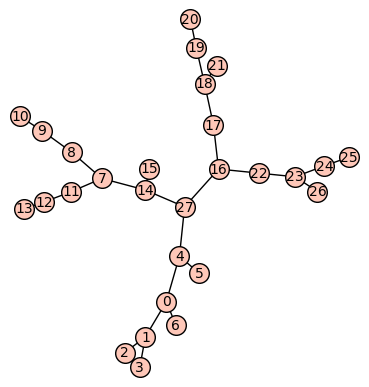

In [23]:
print(a, b, c)
T.plot()

### None of them form a strongly cospectral triple :c

# Tests

In [8]:
def get_frac(T, a):
    X = T.adjacency_matrix()
    phi_X = X.charpoly()
    X_a = (X.delete_rows([a])).delete_columns([a])
    phi_a = X_a.charpoly()
    frac = phi_X/phi_a
    return frac

In [12]:
get_frac(t[0][0], t[0][1])

(x^6 - 6*x^4 + 8*x^2 - 2)/(x^5 - 4*x^3 + 2*x)

In [290]:
d1 = {0:[1, 2], 1:[3], 3:[5], 2:[4], 4:[6]}
T_1 = Graph(d1)
d2 = {0:[1, 2], 2:[3, 4]}
T_2 = Graph(d2)

In [ ]:
n = 11
r = 2
a = 0
b = 0
lis = []
for i in range(n, n+r):
    print(f"Trying graphs with {i} vertices")
    cnt = 0
    for T_3 in TreeIterator(i):
        cnt+=1
        if(T_3.is_isomorphic(T_1) or T_3.is_isomorphic(T_2)):
            print("Isomorphic")
            continue
        if(cnt==21):
            lis.append(T_3)
        for v in T_3:
            T, a_, b_, c_ = join(T_1, T_2, T_3, a, b, v)
            if(not strongly_ab(a_, b_, T.adjacency_matrix(), c_, cnt)):
                lis.append(T_3)
                print(f"Conjecture is false, at this graph {a_} and {b_} cnt = {cnt} v = {v} are not strongly cospectral")
                #P = T.plot()
                #P.show()

In [ ]:
X = lis[0].adjacency_matrix()
X.eigenvectors_right()

4


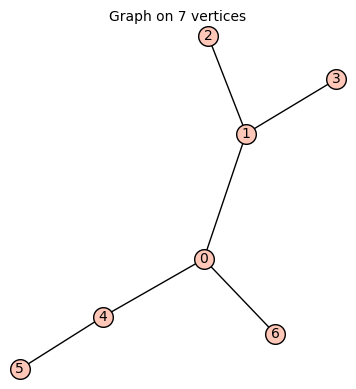

In [17]:
print(t[0][1])
t[0][0]

In [44]:
d1 = {0: [2,3], 3:[4, 5], 5:[6, 7]}
t1 = Graph(d1)dis

In [45]:
d2 = {1:[9, 10], 10:[11, 12], 13:[11, 14], 15:[16, 12]}
t2 = Graph(d2)

In [46]:
d3 = {1:[8, 9], 10:[9, 11, 12], 12:[13], 14:[8, 15, 16], 17:[16]}
t3 = Graph(d3)

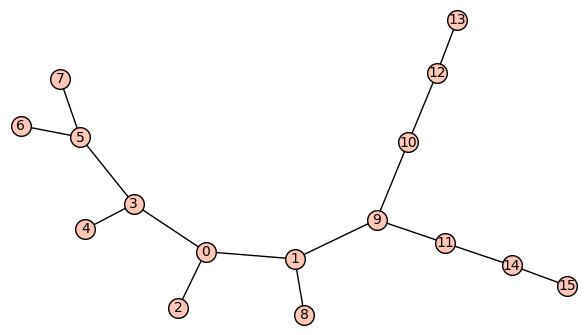

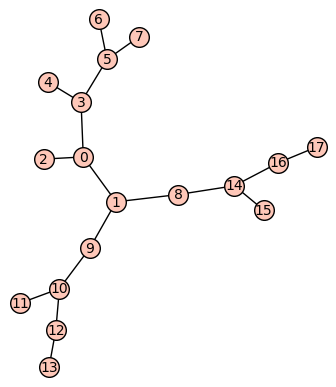

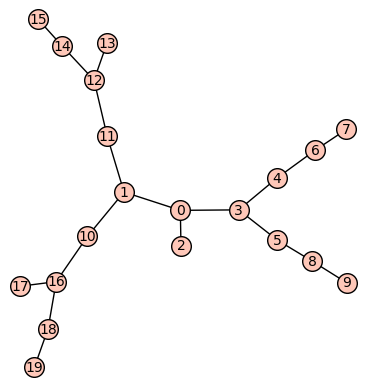

In [77]:
d1 = {0: [2,3], 3:[4, 5], 5:[6, 7]}
t1 = Graph(d1)
d2 = {1:[8, 9], 9:[10, 11], 12:[10, 13], 14:[15, 11]}
t2 = Graph(d2)

d = {**d1, **d2}
d[0].append(1)
t12 = Graph(d)
P = t12.plot()
P.show()

d1 = {0: [2,3], 3:[4, 5], 5:[6, 7]}
d3 = {1:[8, 9], 10:[9, 11, 12], 12:[13], 14:[8, 15, 16], 17:[16]}
t3 = Graph(d3)

d = {**d1, **d3}
d[0].append(1)
t13 = Graph(d)
P = t13.plot()
P.show()

d2 = {0:[2, 3], 3:[4, 5], 6:[4, 7], 8:[9, 5]}
d3 = {1:[10, 11], 12:[11, 13, 14], 14:[15], 16:[10, 17, 18], 19:[18]}

d = {**d2, **d3}
d[0].append(1)
t23 = Graph(d)
P = t23.plot()
P.show()

In [80]:
strongly_ab(0, 1, t12.adjacency_matrix())

True

In [81]:
strongly_ab(0, 1, t13.adjacency_matrix())

True

In [82]:
strongly_ab(0, 1, t23.adjacency_matrix())

True